<a href="https://colab.research.google.com/github/kmkar31/Torchvision_Datasets/blob/master/EMNIST_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMNIST Dataset Pytorch

In [0]:
import torch
import torchvision
import torchvision.datasets as tvds
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from progressbar import ProgressBar
%matplotlib inline

### Hyperparameters and Data Information

In [0]:
num_classes = 47
train_batch_size = 32
test_batch_size = 32
epochs = 10

### Transforms to be performed on the data

In [0]:
feature_transform = torchvision.transforms.Compose([
                                                    torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                    torchvision.transforms.RandomVerticalFlip(p=0.5),
                                                    torchvision.transforms.Resize((28,28)),
                                                    torchvision.transforms.ToTensor()])

### Download and load the Data

In [0]:
train_data = tvds.EMNIST('/tmp/EMNIST_balanced/data/train' , split = 'balanced' , train = True ,
                         download = True , transform = feature_transform )

In [0]:
test_data = tvds.EMNIST('/tmp/EMNIST_balanced/data/test' , split = 'balanced' , train = False ,
                         download = True , transform = feature_transform )

### Model definition as a subclass of torch.nn.Module

In [0]:
class Model(nn.Module):

  def __init__(self , num_classes):
    super(Model , self).__init__()
    self.conv1 = nn.Conv2d(1 , 32 , 2 , padding = 0)
    self.maxpool1 = nn.MaxPool2d(kernel_size = 2 , stride = 1)
    self.conv2 = nn.Conv2d(32 , 32 , 2 , padding = 0)
    self.maxpool2 = nn.MaxPool2d(kernel_size = 2 , stride = 1)
    self.lin1 = nn.Linear(32*24*24 , 128)
    self.out = nn.Linear(128 , num_classes)

  def forward(self , x):
    x = self.conv1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0) , -1)
    x = self.lin1(x)
    x = self.out(x)
    
    return x    

### One_hot_Encode the classes

In [0]:
def one_hot_encode(targets , num_classes):
  temp = np.zeros((targets.size(0) , num_classes))
  for i in range(len(targets)):
    temp[i][targets[i]] = 1
  return temp

### Define the Loss and Optimizer
### Define DataLoader Objects

In [0]:
model = Model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [0]:
trainloader = torch.utils.data.DataLoader(dataset = train_data , batch_size = train_batch_size)
testloader = torch.utils.data.DataLoader(dataset = test_data , batch_size = test_batch_size)

### Define a progress bar to monitor training

In [0]:
pbar = ProgressBar(maxval = len(train_data)//train_batch_size)

### Train the Model

100% (3525 of 3525) |####################| Elapsed Time: 0:05:49 ETA:  00:00:00

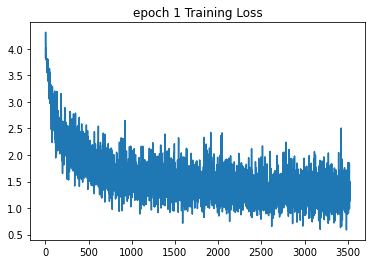

100% (3525 of 3525) |####################| Elapsed Time: 0:06:08 ETA:  00:00:00

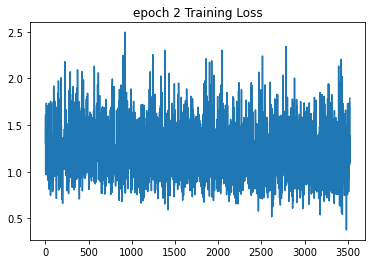

100% (3525 of 3525) |####################| Elapsed Time: 0:06:06 ETA:  00:00:00

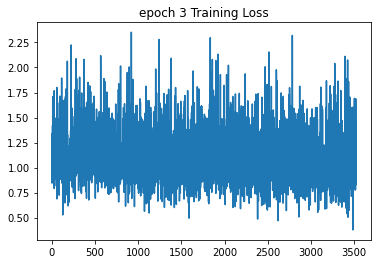

100% (3525 of 3525) |####################| Elapsed Time: 0:06:05 ETA:  00:00:00

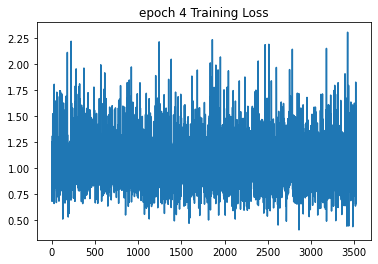

100% (3525 of 3525) |####################| Elapsed Time: 0:06:06 ETA:  00:00:00

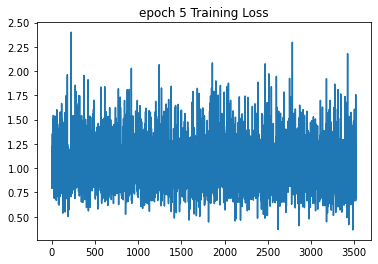

100% (3525 of 3525) |####################| Elapsed Time: 0:06:07 ETA:  00:00:00

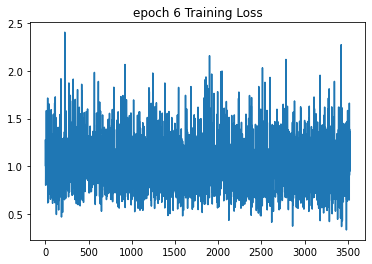

100% (3525 of 3525) |####################| Elapsed Time: 0:06:06 ETA:  00:00:00

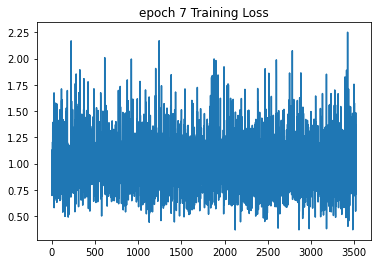

100% (3525 of 3525) |####################| Elapsed Time: 0:06:00 ETA:  00:00:00

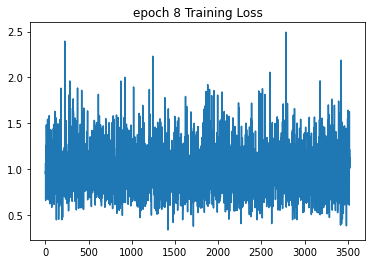

100% (3525 of 3525) |####################| Elapsed Time: 0:06:07 ETA:  00:00:00

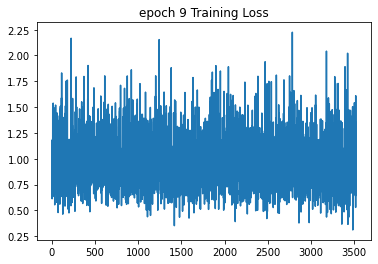

100% (3525 of 3525) |####################| Elapsed Time: 0:06:07 ETA:  00:00:00

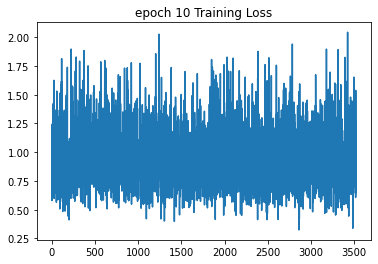

In [11]:
TRAIN_LOSS = []
for e in range(epochs):
  train_epoch_loss = []
  test_epoch_accuracy = []
  i = 0
  pbar.start()
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat , y)
    train_epoch_loss.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    i = i+1
    pbar.update(i)
  TRAIN_LOSS.append(np.mean([ x.detach().numpy() for x in train_epoch_loss]))
  plt.plot(train_epoch_loss)
  plt.title("epoch %d Training Loss" %(e+1))
  plt.show()

### Plot Average Loss per Epoch

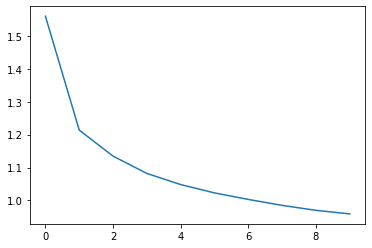

In [12]:
plt.plot(TRAIN_LOSS)

### Generate Predictions on the Test set

In [0]:
model.eval()
predictions = []
test_labels = []
for x,y in testloader:
  yhat = model(x)
  _,yhat = yhat.max(1)
  predictions.append(yhat.tolist())
  test_labels.append(y.tolist())

### Unroll the lists from a batch-wise form to a single dimension list

In [0]:
def unroll_arrays(array):
  temp = []
  for x in array:
    for y in x:
      temp.append(y)
  return temp

In [0]:
predictions = unroll_arrays(predictions)
test_labels = unroll_arrays(test_labels)

### Calculate Predition Accuracy

In [16]:
c = 0
for i in range(len(test_labels)):
  if test_labels[i]-predictions[i]==0:
    c = c+1
print("Test Accuracy :" , (c/len(test_labels))*100 , "%")

Test Accuracy : 68.55851063829788 %
